# Prediction of academic achievement in adolescents from teacher reports of inattention in childhood - a pattern classification study
### AJ Lundervold, T Bø, A Lundervold

<img src="Data_to_classes_pptx.png",width=700,height=700>

In [262]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import ggplot
import os

# N(ot true), S(omewhat true), C(ertainly true) on SNAP
# L(ow), M(edium), H(igh) marks / mean academic achievement
f1 = "../data/inattention_nomiss_2397x12_snap_is_0_1_2.csv"
f2 = "../data/inattention_nomiss_2397x12_snap_is_0_1_2_outcome_is_L_M_H.csv"
f3 = "../data/inattention_nomiss_2397x12_snap_is_N_S_C_outcome_is_L_M_H.csv"
f4 = "../data/inattention_nomiss_2397x12_snap_is_0_1_2_outcome_is_0_1_2.csv"
df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)

### Exploring the data

In [263]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 12 columns):
gender    2397 non-null int64
grade     2397 non-null int64
snap1     2397 non-null int64
snap2     2397 non-null int64
snap3     2397 non-null int64
snap4     2397 non-null int64
snap5     2397 non-null int64
snap6     2397 non-null int64
snap7     2397 non-null int64
snap8     2397 non-null int64
snap9     2397 non-null int64
ave       2397 non-null float64
dtypes: float64(1), int64(11)
memory usage: 224.8 KB


In [264]:
df1.head()

,gender,grade,snap1,snap2,snap3,snap4,snap5,snap6,snap7,snap8,snap9,ave
0,1,2,1,1,1,1,1,1,1,1,1,4.666667
1,1,2,1,1,2,1,1,1,1,1,1,3.666667
2,1,2,1,1,1,1,1,1,1,1,1,4.142857
3,1,2,1,1,1,1,1,1,1,1,1,4.111111
4,1,2,1,1,1,1,1,1,1,1,1,4.300000


In [265]:
df1.tail()

,gender,grade,snap1,snap2,snap3,snap4,snap5,snap6,snap7,snap8,snap9,ave
2392,0,4,0,2,2,1,1,1,1,2,1,2.333333
2393,0,4,2,2,2,2,1,2,1,2,1,3.875000
2394,0,4,2,1,1,1,1,1,1,1,1,3.888889
2395,0,4,2,2,1,1,1,1,2,2,2,3.777778
2396,0,4,2,1,1,1,1,1,1,1,1,2.555556


### Make shorter feature names

In [266]:
old_names = df1.columns.tolist()
new_names = ['s','g','s1','s2','s3','s4','s5','s6','s7','s8','s9','a']
df = df1.copy()  # deep copy
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
pd.DataFrame(df.count()).T  # non NA/null values

,s,g,s1,s2,s3,s4,s5,s6,s7,s8,s9,a
0,2397,2397,2397,2397,2397,2397,2397,2397,2397,2397,2397,2397


### Summary statistics

In [267]:
df.describe().round(2)

,s,g,s1,s2,s3,s4,s5,s6,s7,s8,s9,a
count,2397.00,2397.00,2397.00,2397.00,2397.00,2397.00,2397.00,2397.00,2397.00,2397.00,2397.00,2397.00
mean,0.52,2.81,1.09,1.08,1.07,1.06,1.06,1.06,1.03,1.17,1.08,4.02
std,0.50,0.79,0.35,0.33,0.28,0.27,0.29,0.28,0.19,0.47,0.32,0.73
min,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.56
50%,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.08
75%,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.56
max,1.00,4.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,5.90


In [268]:
pd.DataFrame([df1.columns, df.columns, df1.dtypes])

,0,1,2,3,4,5,6,7,8,9,10,11
0,gender,grade,snap1,snap2,snap3,snap4,snap5,snap6,snap7,snap8,snap9,ave
1,s,g,s1,s2,s3,s4,s5,s6,s7,s8,s9,a
2,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64


In [269]:
df_m = (df.groupby('s').get_group(0)).iloc[:,1:]  # pandas DataFrame
X_m = df_m.as_matrix()   # numpy ndarray
df_f = (df.groupby('s').get_group(1)).iloc[:,1:]
X_f = df_f.as_matrix()

In [270]:
# Correlation girls
df_f.corr().round(2)

,g,s1,s2,s3,s4,s5,s6,s7,s8,s9,a
g,1.00,0.01,-0.03,0.00,-0.01,0.01,0.08,-0.02,-0.01,-0.05,-0.07
s1,0.01,1.00,0.11,0.16,0.26,0.13,0.21,0.16,0.23,0.07,-0.09
s2,-0.03,0.11,1.00,0.22,0.27,0.35,0.21,0.09,0.35,0.24,-0.20
s3,0.00,0.16,0.22,1.00,0.24,0.08,0.09,0.24,0.15,0.05,-0.07
s4,-0.01,0.26,0.27,0.24,1.00,0.39,0.29,0.16,0.08,0.25,-0.16
s5,0.01,0.13,0.35,0.08,0.39,1.00,0.29,0.15,0.16,0.30,-0.11
s6,0.08,0.21,0.21,0.09,0.29,0.29,1.00,0.06,0.17,0.14,-0.16
s7,-0.02,0.16,0.09,0.24,0.16,0.15,0.06,1.00,0.11,0.16,-0.04
s8,-0.01,0.23,0.35,0.15,0.08,0.16,0.17,0.11,1.00,0.22,-0.12
s9,-0.05,0.07,0.24,0.05,0.25,0.30,0.14,0.16,0.22,1.00,-0.10


In [271]:
# Correlation boys
df_m.corr().round(2)

,g,s1,s2,s3,s4,s5,s6,s7,s8,s9,a
g,1.00,-0.01,-0.01,-0.04,0.01,-0.03,0.02,-0.02,-0.03,-0.03,-0.02
s1,-0.01,1.00,0.21,0.09,0.17,0.15,0.23,0.12,0.16,0.13,-0.08
s2,-0.01,0.21,1.00,0.21,0.28,0.33,0.26,0.16,0.31,0.17,-0.07
s3,-0.04,0.09,0.21,1.00,0.36,0.23,0.20,0.13,0.13,0.18,-0.09
s4,0.01,0.17,0.28,0.36,1.00,0.33,0.36,0.20,0.08,0.18,-0.13
s5,-0.03,0.15,0.33,0.23,0.33,1.00,0.31,0.19,0.16,0.26,-0.13
s6,0.02,0.23,0.26,0.20,0.36,0.31,1.00,0.08,0.16,0.07,-0.11
s7,-0.02,0.12,0.16,0.13,0.20,0.19,0.08,1.00,0.07,0.30,-0.10
s8,-0.03,0.16,0.31,0.13,0.08,0.16,0.16,0.07,1.00,0.16,-0.10
s9,-0.03,0.13,0.17,0.18,0.18,0.26,0.07,0.30,0.16,1.00,-0.09


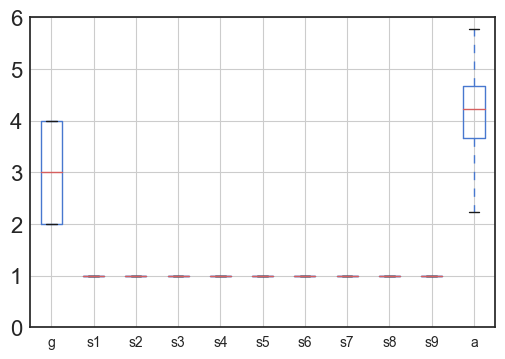

In [272]:
df_f.boxplot()

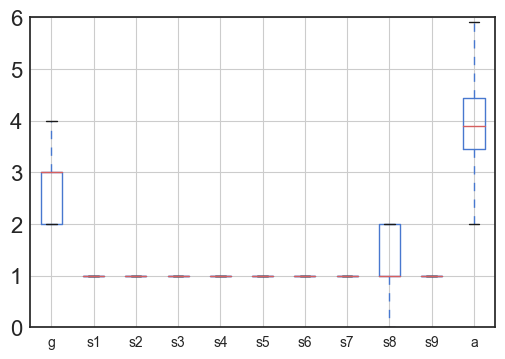

In [273]:
df_m.boxplot()

### Get gender-specific frequency distributions of SNAP1,...,SNAP9

In [274]:
f_f = pd.DataFrame()
f_m = pd.DataFrame()
for col in new_names[2:-1]:
    acc_f = pd.value_counts(df_f[col]).sum()
    f_f[col] = pd.DataFrame((pd.value_counts(df_f[col], sort=False))*(100/acc_f))
    acc_m = pd.value_counts(df_m[col]).sum()
    f_m[col] = pd.DataFrame((pd.value_counts(df_m[col], sort=False))*(100/acc_m))

In [275]:
# SNAP frequency distribution girls
f_f.round(1)

,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,1.3,0.5,0.2,0.2,0.5,0.4,0.3,1.4,0.4
1,91.1,93.9,96.6,96.2,95.9,96.2,98.5,84.3,93.3
2,7.6,5.6,3.2,3.6,3.6,3.4,1.2,14.3,6.3


In [276]:
# SNAP frequency distribution boys
f_m.round(1)

,s1,s2,s3,s4,s5,s6,s7,s8,s9
0,2.6,3.9,1.1,1.1,2.2,2.4,0.7,6.6,1.9
1,81.9,82.1,86.6,88.4,86.3,86.5,94.2,64.4,85.0
2,15.4,14.0,12.4,10.4,11.5,11.1,5.1,29.0,13.1


In [277]:
# Find label for lowest academic achievement
label_l = df['a'].idxmin()
df.select(lambda x: x==label_l)

,s,g,s1,s2,s3,s4,s5,s6,s7,s8,s9,a
134,1,2,1,1,1,1,1,1,1,1,1,1.0


In [278]:
# Find label for highest academic achievement
label_h = df['a'].idxmax()
df.select(lambda x: x==label_h)

,s,g,s1,s2,s3,s4,s5,s6,s7,s8,s9,a
2109,0,3,1,1,1,1,1,1,1,1,1,5.9


### Plotting

In [279]:
print(plt.style.available)
my_currdir = os.getcwd()

['bmh', 'seaborn-notebook', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-poster', 'classic', 'ggplot', 'seaborn-muted', 'grayscale', 'seaborn-bright', 'seaborn-dark-palette', 'seaborn-paper', 'seaborn-talk', 'seaborn-deep', 'seaborn-white', 'seaborn-whitegrid', 'seaborn-ticks', 'seaborn-pastel', 'dark_background', 'fivethirtyeight', 'seaborn', 'seaborn-colorblind']


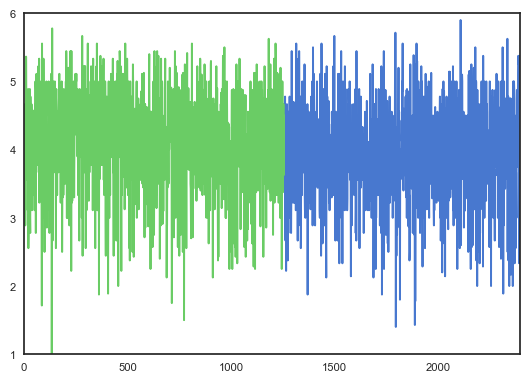

In [280]:
#plt.style.use('ggplot')
#plt.style.use('classic')
plt.style.use('seaborn-paper')
plt.figure(); df_m['a'].plot(); df_f['a'].plot()

/Users/arvid/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


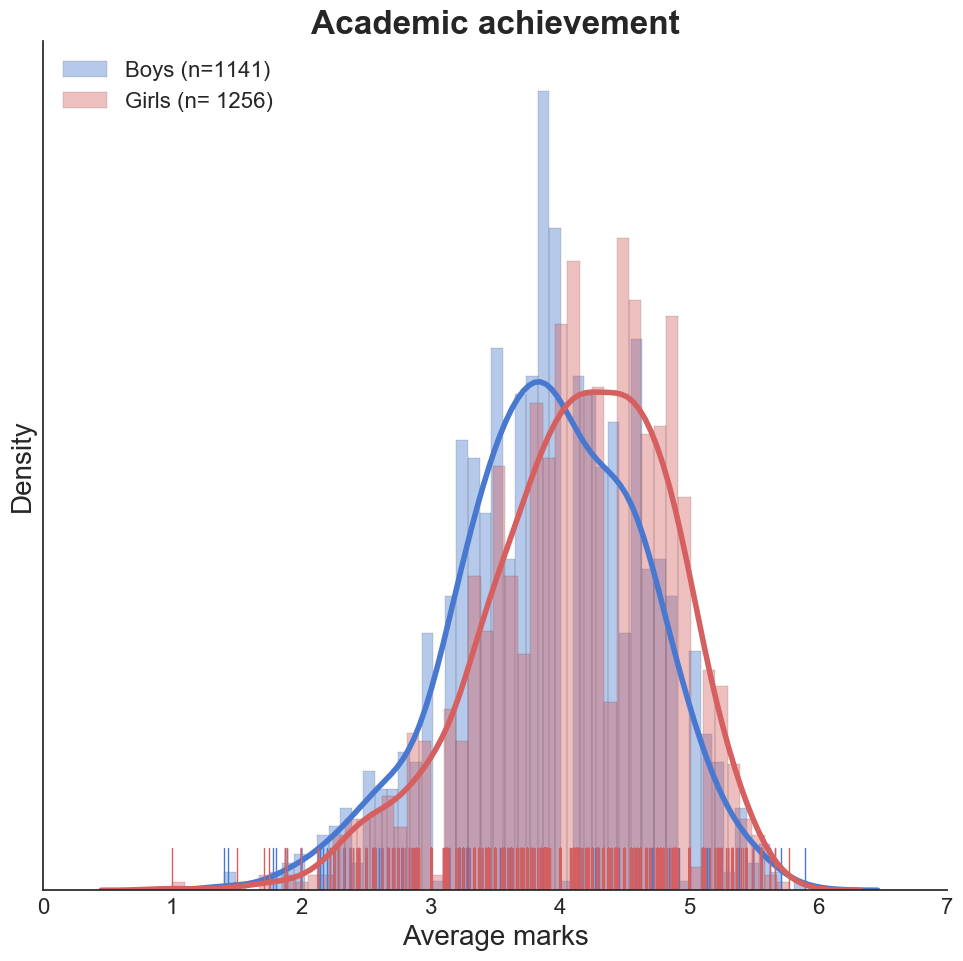

In [281]:
plt.style.use('classic')
sns.set(style="ticks", palette="muted", color_codes=True)
paper_rc = {'lines.linewidth': 4, 'lines.markersize': 10} 
sns.set_style("white", {"axes.facecolor": "1.0"})
sns.set_context("paper", rc = paper_rc, font_scale = 2) 

fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True)
sns.despine(left=False)

# Plot a kernel density estimate and rug plot
label_m = "Boys (n=%d)" % df_m.shape[0]
label_f = "Girls (n= %d)" % df_f.shape[0]
sns.distplot(df_m['a'].values,hist=True,bins=50,rug=True,color="b",label=label_m)
sns.distplot(df_f['a'].values,hist=True,bins=50,rug=True,color="r",label=label_f)
axes.set_title('Academic achievement',fontsize=24, fontweight='bold')
axes.set_xlabel('Average marks',fontsize=20)
axes.set_ylabel('Density',fontsize=20)

axes.legend(loc='upper left',fontsize='small')

plt.setp(axes, yticks=[])
plt.tight_layout()

plt.savefig(my_currdir + '/../images/acadmic_achievement_vs_gender.pdf', bbox_inches='tight')
#plt.savefig('acadmic_achievement_vs_gender.png', bbox_inches='tight', dpi=300)

### Make category variables explicit, rename some variables and some category values

In [282]:

df_c = df.copy()
for col in new_names[:-1]:
    df_c[col] = df_c[col].astype('category')
names_df = ['s', 'g', 'a']
names_df_c = ['gender', 'grade', 'marks']
df_c.rename(columns=dict(zip(names_df, names_df_c)), inplace=True)
pd.DataFrame([df_c.dtypes])

,gender,grade,s1,s2,s3,s4,s5,s6,s7,s8,s9,marks
0,category,category,category,category,category,category,category,category,category,category,category,float64


In [283]:
#Define a generic function using Pandas replace function to rename variable values
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

genderDict = {0: 'boy', 1: 'girl'}
df_c['gender'] = coding(df_c['gender'], genderDict)
pd.DataFrame(pd.value_counts(df_c['gender']))

,gender
girl,1256
boy,1141


### Make discretization of academic achievement (marks) into three equifrequent categories: Low, Medium, High

In [284]:
# In R: => descr = 1:[1.00, 3.75) 2:[3.75,4.43) 3:[4.43,5.90] - 1:low, 2:medium; 3:high average mark
df_cc = df_c.copy()
print(pd.qcut(df_cc['marks'], 3).unique())
LMH = pd.qcut(df_cc['marks'], 3, labels=['L', 'M', 'H'])
print(LMH.value_counts())
df_cc.rename(columns=dict(zip(['marks'], ['LMH'])), inplace=True)
df_cc['LMH'] = LMH

print(df_cc.head())
df_cc['gender'] = df_cc['gender'].astype('category')
pd.DataFrame([df_cc.dtypes])

[(4.429, 5.9], [1, 3.75], (3.75, 4.429]]
Categories (3, object): [[1, 3.75] < (3.75, 4.429] < (4.429, 5.9]]
L    809
M    798
H    790
Name: marks, dtype: int64
  gender grade s1 s2 s3 s4 s5 s6 s7 s8 s9 LMH
0   girl     2  1  1  1  1  1  1  1  1  1   H
1   girl     2  1  1  2  1  1  1  1  1  1   L
2   girl     2  1  1  1  1  1  1  1  1  1   M
3   girl     2  1  1  1  1  1  1  1  1  1   M
4   girl     2  1  1  1  1  1  1  1  1  1   M


,gender,grade,s1,s2,s3,s4,s5,s6,s7,s8,s9,LMH
0,category,category,category,category,category,category,category,category,category,category,category,category


### Mulitnomial logistic regression
http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html

In [285]:
predictors = ['s1','s2','s3','s4','s5','s6','s7','s8','s9']
XX = df[predictors].as_matrix()
X1 = XX.mean(axis=1)
X2 = XX.std(axis=1)
# X = np.vstack((X1,X2))
pred = pd.DataFrame(np.vstack((X1,X2)).T)
X = pred.as_matrix()   # 'numpy.ndarray'
pred.shape

(2397, 2)

In [286]:
marksDict = {'L': 1, 'M': 2, 'H': 3}
df_ccc = df_cc.copy()
df_ccc['LMH'] = coding(df_ccc['LMH'], marksDict)

target = df_ccc['LMH'].values
print(target)
#y = target
target.shape

[3 1 2 ..., 2 2 1]


(2397,)

In [287]:
# http://stackoverflow.com/questions/31507396/mnlogit-in-statsmodel-returning-nan
import statsmodels.api as st

x = df.drop(['s','g','a'], axis = 1)
y = df_ccc['LMH']
# specify the model
mdl = st.MNLogit(y, x)
mdl_fit = mdl.fit()  
# print model summary 
print(mdl_fit.summary())
x.head()
mdl_fit.predict()

Optimization terminated successfully.
         Current function value: 1.090257
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                    LMH   No. Observations:                 2397
Model:                        MNLogit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           16
Date:                Tue, 24 Jan 2017   Pseudo R-squ.:                0.007563
Time:                        13:35:31   Log-Likelihood:                -2613.3
converged:                       True   LL-Null:                       -2633.3
                                        LLR p-value:                 0.0008247
     LMH=2       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
s1             0.1509      0.148      1.018      0.309        -0.140     0.441
s2            -0.2621      0.

/Users/arvid/anaconda3/lib/python3.5/site-packages/statsmodels/discrete/discrete_model.py:580: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  start_params = np.zeros((self.K * (self.J-1)))
/Users/arvid/anaconda3/lib/python3.5/site-packages/statsmodels/discrete/discrete_model.py:1840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1, order='F')
/Users/arvid/anaconda3/lib/python3.5/site-packages/statsmodels/discrete/discrete_model.py:1756: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1, order='F')
/Users/arvid/anaconda3/lib/python3.5/site-packages/statsmodels/discrete/discrete_model.py:1697: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = par

array([[ 0.33425548,  0.33353555,  0.33220897],
       [ 0.32465715,  0.32704476,  0.34829808],
       [ 0.33425548,  0.33353555,  0.33220897],
       ..., 
       [ 0.32602136,  0.37829763,  0.29568101],
       [ 0.23937916,  0.40950125,  0.35111959],
       [ 0.32602136,  0.37829763,  0.29568101]])

## TO DO:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression


#- make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)


for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    #- print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    #- create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #- Plot the decision boundary. For that, we will assign a color to each
    #- point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #- Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    #- Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    #- Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

X = df[list(df.columns)[:-1]]
y = df['averBinned']
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
y_num=le.fit_transform(y)

#old_names = df.columns.tolist()
#new_names = ['ACCC_L', 'MFC_L', 'OFL_L', 'OFM_L', 'MFR_L', 'INS_L', 
#-             'ACCC_R', 'MFC_R', 'OFL_R', 'OFM_R', 'MFR_R', 'INS_R', 
#-             'target'] 
#df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
#- Get the Low academic achievement data
df_L = (df.groupby('averBinned').get_group('L')).iloc[:,:-1]
X_L = df_L[list(df_L.columns)[:]]
#- Get the Medium academic achievement data
df_M = (df.groupby('averBinned').get_group('M')).iloc[:,:-1]
X_M = df_M[list(df_M.columns)[:]]
#- Get the High academic achievement data
df_H = (df.groupby('averBinned').get_group('H')).iloc[:,:-1]
X_H = df_H[list(df_H.columns)[:]]
df_L.hist()

## Investigating the prediction academic achievment from inattention data using machine learning



import pickle

PANDA to NUMPY.  .as_matrix()

list .... .string_contans('....   ')

pandas.tools.plotting.scatter_matrix 
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Ytest_split, Ypred_split))

Neural networks generally, performs generally better than random forest on time series
Multilayer perceptrons now in Scikit


## Introduction
Cortical thickness might be influenced by chronic pain conditions, and can therefore be increased or decreased in different brain regions. In the irritable bowel syndrome (IBS) brain, a core network is the salience network, responding to subjective salience of stimulus or the expectation of stimulus. In our study machine learning classification methods was used to analyze cortical thickness in key nodes of the salience network. 


FIGURE

reorder_list = [0, 6, 1, 7, 2, 8, 3, 9, 4, 10, 5, 11]
old_names_reorder = [old_names[i] for i in reorder_list]
new_names_reorder = [new_names[i] for i in reorder_list]

sns.set(style="ticks", palette="muted", color_codes=True)
paper_rc = {'lines.linewidth': 4, 'lines.markersize': 10} 
sns.set_style("white", {"axes.facecolor": "1.0"})
sns.set_context("paper", rc = paper_rc, font_scale = 3) 

fig, axes = plt.subplots(6, 2, figsize=(15, 20), sharex=True)
sns.despine(left=False)

#- Plot a kernel density estimate and rug plot
#- Plot a kernel density estimate and rug plot
for i in range(0,len(reorder_list)):
    k1 = math.floor(i/2) # 0,0,1,1,2,2,3,3, ... 
    k2 = i%2  # Left / Right parity
    if (k1 == 0) & (k2 == 1):
        sns.distplot(X_hc[new_names_reorder[i]].values,hist=False,rug=True,color="r",ax=axes[k1,k2],label='HC')
        sns.distplot(X_ibs[new_names_reorder[i]].values,hist=False,rug=True,color="b",ax=axes[k1,k2],label='IBS')
        axes[k1,k2].set_title(old_names_reorder[i],fontsize=24, fontweight='bold')
    sns.distplot(X_hc[new_names_reorder[i]].values,hist=False,rug=True,color="r",ax=axes[k1,k2])
    sns.distplot(X_ibs[new_names_reorder[i]].values,hist=False,rug=True,color="b",ax=axes[k1,k2])
    axes[k1,k2].set_title(old_names_reorder[i],fontsize=24, fontweight='bold')

plt.setp(axes, yticks=[])
plt.tight_layout()

plt.savefig('regional_mean_cortical_thickness_density.pdf', bbox_inches='tight')

## Methods and materials
Two successive 3D T1-weighted MRI acquisitions from 15 IBS patients and 15 healthy controls (HC) were recorded on a GE Sigma 3.0T MR scanner and segmented with FreeSurfer. Mean cortical thickness values from anatomical regions in the salience network were extracted and analyzed in Python/scikit-learn using various machine learning classifiers, with the goal of differentiating HC and IBS. It is suspected that the insular cortex plays an important role in IBS. To investigate this we've set up a prediction framework based on mean cortical thickness in the insula. 

FIGURE

For training the classifiers we used a "leave-one-out" method, where the diagnosis of each patient is predicted by training the classifiers on the remaining patients. Since each patient was scanned twice, we remove the data corresponding to the test data from the training set each time.

from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifiers = [
               RandomForestClassifier(n_estimators = 5, max_depth = 2),
               ExtraTreesClassifier(n_estimators = 5, max_depth = 2, n_jobs=-1),
               MLPClassifier(alpha = 0.05, max_iter=10000),
               AdaBoostClassifier(learning_rate=0.1, n_estimators=50),
               GaussianNB(),
               QuadraticDiscriminantAnalysis(),
               KNeighborsClassifier(n_neighbors = 2)
               ]

names = [
        'Random forest', 
        'ExtraTreesClassifier',
        'Neural net', 
        'AdaBoost', 
        'Naive Bayes', 
        'QDA',
        'KNN'
        ]

# Results
Cortical thickness (mm) in the salience network for both groups:

IMAGE.  IMAGE Scatter plot

X = X[['Insula_L', 'Insula_R']]
xHC = df_hc[['INS_L','INS_R']].values
xIBS = df_ibs[['INS_L','INS_R']].values


fig = plt.subplots(1, 1, figsize=(7, 7), sharex=True)

hc = plt.scatter(xHC[:,0], xHC[:,1], marker='o', color='r', edgecolor='black', linewidth='1', alpha=.8, s=200)
ibs = plt.scatter(xIBS[:,0], xIBS[:,1], marker='o', color='b',  edgecolor='black', linewidth='1', alpha=.8, s=200)

plt.legend((hc, ibs),
           ('HC', 'IBS'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=16)

plt.xlabel('Insula_L [mm]', fontsize=16)
plt.ylabel('Insula_R [mm]', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

#- plt.show()

plt.savefig('mean_cortical_thickness_R_vs_L_Insula.pdf', bbox_inches='tight')

#- X = X[['Insula_L', 'Insula_R']]

#- plt.scatter(X['Insula_L'], X['Insula_R'], c=y_num, cmap=plt.cm.Paired, s=100);

from sklearn.preprocessing import StandardScaler

def scoreLOO(clf, X, prepost=True, scorer="accuracy"):
    scores=[]
    trainscore=[]
    for train_index, test_index in loo.split(X):
            X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]

            if prepost:
                # Remove corresponding pair in X_train:
                y_train, y_test = y[train_index], y[test_index]
                if (y_test.index % 2 == 0): #even (pre meal)
                    X_train = X_train.drop(y_test.index + 1)  #(after meal)
                    y_train = y_train.drop(y_test.index + 1)
                else: #odd (after meal)
                    X_train = X_train.drop(y_test.index - 1) #(pre meal)
                    y_train = y_train.drop(y_test.index - 1)
           
            # Feature scaling
            sc = StandardScaler()
            sc.fit(X_train)

            # Classifier
            clfer=clf.fit(sc.transform(X_train), y_train)

            y_pred = clf.predict(sc.transform(X_test))
            y_train_pred = clf.predict(sc.transform(X_train))
            
            if scorer=="accuracy":
                scores.append(accuracy_score(y_test, y_pred))
                trainscore.append(accuracy_score(y_train, y_train_pred))
            else:
                scores.append(accuracy_score(y_test, y_pred))
                trainscore.append(accuracy_score(y_train, y_train_pred))
            
    return np.mean(scores), np.mean(trainscore)

scorers = [
    "accuracy" 
]

num_runs=50

for scorer in scorers:
    for name, clf in zip(names, classifiers):
        totalscores=[]
        trainscores=[]

        for i in range(1,num_runs):
            meanscore, meantrainscore = scoreLOO(clf, X, prepost=True, scorer=scorer)
            totalscores.append(meanscore)
            trainscores.append(meantrainscore)

        print("Training scores (%s): %s: \t %0.2f (+/- %0.3f) \n" % (scorer, 
                                                                     name, 
                                                                     np.mean(trainscores), 
                                                                     np.std(trainscores)))
        print("%s, %s: \t %0.2f (+/- %0.3f) \n ------------ \n" % (scorer, 
                                                                   name, 
                                                                   np.mean(totalscores), 
                                                                   np.std(totalscores)))

Training scores (accuracy): Random forest: 	 0.74 (+/- 0.005) 

accuracy, Random forest: 	 0.48 (+/- 0.056) 
 ------------ 

Training scores (accuracy): ExtraTreesClassifier: 	 0.68 (+/- 0.007) 

accuracy, ExtraTreesClassifier: 	 0.45 (+/- 0.048) 
 ------------ 

Training scores (accuracy): Neural net: 	 0.80 (+/- 0.002) 

accuracy, Neural net: 	 0.63 (+/- 0.012) 
 ------------ 

Training scores (accuracy): AdaBoost: 	 0.82 (+/- 0.000) 

accuracy, AdaBoost: 	 0.52 (+/- 0.000) 
 ------------ 

Training scores (accuracy): Naive Bayes: 	 0.64 (+/- 0.000) 

accuracy, Naive Bayes: 	 0.52 (+/- 0.000) 
 ------------ 

Training scores (accuracy): QDA: 	 0.71 (+/- 0.000) 

accuracy, QDA: 	 0.63 (+/- 0.000) 
 ------------ 

Training scores (accuracy): KNN: 	 0.78 (+/- 0.000) 

accuracy, KNN: 	 0.57 (+/- 0.000) 
 ------------ 


# Conclusion and discussion

Patients with IBS are known to have brain signatures within the salience network that differs from healthy controls. Finding such patterns would make it possible to discriminate between the IBS and HC brain and is a highly interesting problem, both diagnostically and mechanistically. An overall change in the network could indicate an altered interoceptive function in IBS patients constituting of several minor non-significant findings. 

The present study is part of an investigation into the salience network of IBS patients, using MRI and fMRI together with a meal intervention. The classification techniques studied here wasn't able to distinguish between patients and control in a significantly accurate manner. This is likely because the dataset is small and the subtle variation of the cortical thickness patterns across the groups.

Using the fMRI data recorded pre and post meal intervention to construct activation graphs in the salience network, and use these networks to classify patients and healthy control would likely lead to better results. This approach is presently being investigated.